https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [20]:
from sklearn.datasets import make_classification

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [21]:
type(X)

numpy.ndarray

In [22]:
len(X)


1000

In [23]:
X[0]

array([-2.04582165, -0.13791624, -0.08071423,  2.52203779,  0.74616483,
       -0.90696374, -0.22164773,  1.0142675 , -0.54154924,  0.22661946,
       -0.64635911,  1.37408466,  1.00905314,  0.67411002,  1.53458328,
        0.47971118, -0.91291053,  2.48194524,  0.74236675,  0.23154789])

In [24]:
X[0][0]

-2.045821653724383

In [25]:
type(y)

numpy.ndarray

In [26]:
len(y)

1000

In [27]:
y[0]

0

In [28]:
from sklearn.model_selection import train_test_split

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [29]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# ns_probs

In [30]:
from sklearn.linear_model import LogisticRegression

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)



LogisticRegression()

In [31]:

# predict probabilities
lr_probs = model.predict_proba(testX)
# print("lr_probs", lr_probs)



# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# print("lr_probs", lr_probs)

In [32]:


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


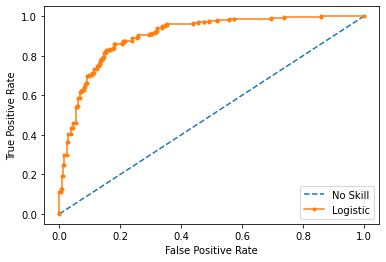

In [33]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()